In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=365, freq="D") 
prices = np.random.uniform(10, 50, size=365)
sales = 500 - 10 * prices + np.random.normal(0, 10, size=365)

In [5]:
data = pd.DataFrame({"Date": dates, "Price": prices, "Sales": sales})
data["Sales"] = data["Sales"].apply(lambda x: max(0, x))

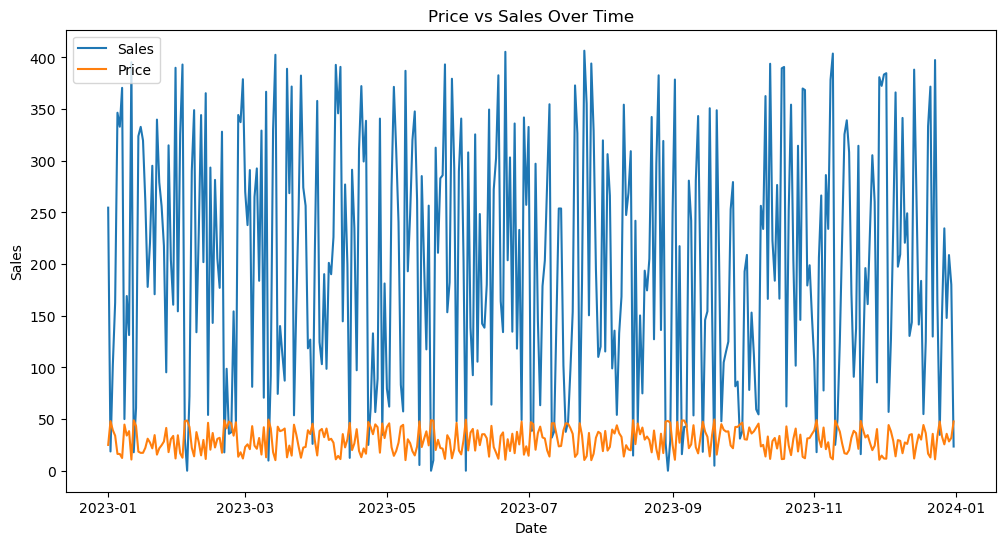

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x="Date", y="Sales", label="Sales")
sns.lineplot(data=data, x="Date", y="Price", label="Price")
plt.title("Price vs Sales Over Time")
plt.legend()
plt.show()

In [9]:
X = data[["Price"]]
y = data["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [15]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 110.57925781240436
R2 Score: 0.9913850755321247


In [17]:
data["Date"] = pd.to_datetime(data["Date"])  
data = data.set_index("Date")  
data.index.freq = "D"

In [19]:
model_ts = ExponentialSmoothing(data["Sales"], trend="add", seasonal="add", seasonal_periods=30)
fit_ts = model_ts.fit()

In [21]:
forecast = fit_ts.forecast(30)

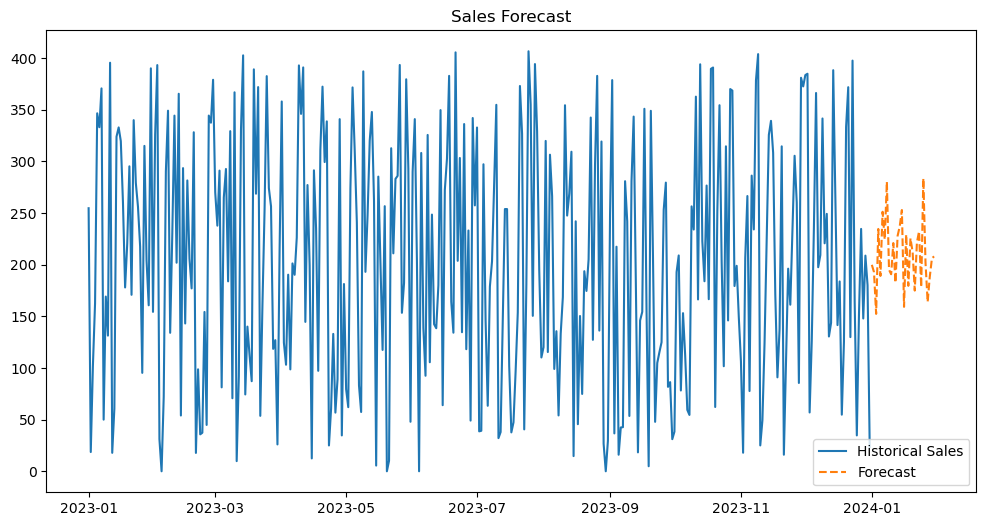

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Sales"], label="Historical Sales")
plt.plot(forecast.index, forecast, label="Forecast", linestyle="--")
plt.title("Sales Forecast")
plt.legend()
plt.show()